# Exercise 2

This notebook shows how we can perform linear regression on a dataset, this time using gradient descent.

We generate a noisy dataset (same as in a previous exercise):

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

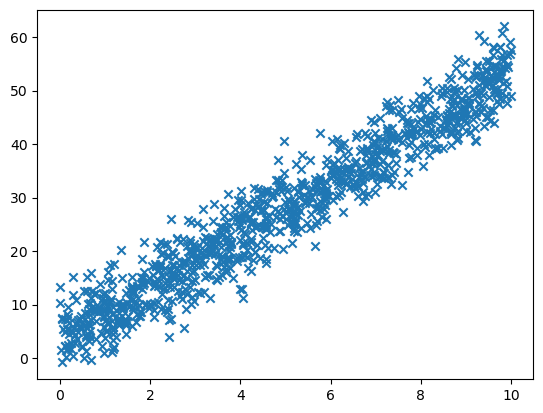

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Add a column of ones to `X`, as we want to simplify the bias calculation (as in the previous exercise)
 - Calculate the predictions as you did in the first exercise, with a matrix multiplication.
 - Calculate the loss based on the mean-squared-error. Use `y` for computing the loss, not `ground_truth`.
 - Derive a formula for calculating the gradient for this example. Then, implement it using numpy. The result of the gradient should be `[[-366.03967789]
 [ -56.30949238]]` (since I seeded the random generators every time, we should all get the same results).

 - Write a loop that performs loss calculation, gradient calculation and updating the weights via a defined learning rate for a given number of iterations (e.g. 100 or 1000). Does it converge? Try different learning rates.
 - If your solution converges, draw the regressed line along with the data points.

## Solution

In [5]:
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(X.shape[-1] + 1) # +1 because you will add the column of ones later on
print(weights.shape)

(2, 1)


In [6]:
b = weights[-1]
a = weights[:-1]
y_pred = np.dot(X,a) + b

In [7]:
n = len(y)

gradient_a = (2 / n) * np.dot(X.T, (y_pred - y))
gradient_b = (2 / n) * np.sum(y_pred - y)


print("Gradient for weights 'a':",gradient_a[0][0])

print("\nGradient for bias 'b':",gradient_b)


Gradient for weights 'a': -366.0396778878957

Gradient for bias 'b': -56.30949238111216


In [8]:
def calculate_mse(X, y, weights):
    y_pred = np.dot(X, weights[:-1]) + weights[-1]
    mse = np.mean((y_pred - y) ** 2)
    return mse

In [9]:
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    mse_list = []

    for i in range(num_iterations):
        
        b = weights[-1]
        a = weights[:-1]

        y_pred = np.dot(X,a) + b  
        error = y_pred - y 

        
        gradient_a = (2 / len(y)) * np.dot(X.T, error)
        gradient_b = (2 / len(y)) * np.sum(error)

        
        weights[:-1] -= learning_rate * gradient_a
        weights[-1] -= learning_rate * gradient_b

        mse = calculate_mse(X, y, weights)
        mse_list.append(mse)

    return weights, mse_list

In [10]:
def plot_regression_line(X, y, optimized_weights):
    plt.scatter(X[:, 0], y, color='blue', label='Data points')
    
    regression_line = np.dot(X, optimized_weights[:-1]) + optimized_weights[-1]
    
    plt.plot(X, regression_line, color='red', label='Regression line')  
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

Converged for learning rate 0.001 and weights [[5.22263551]
 [1.54652569]]


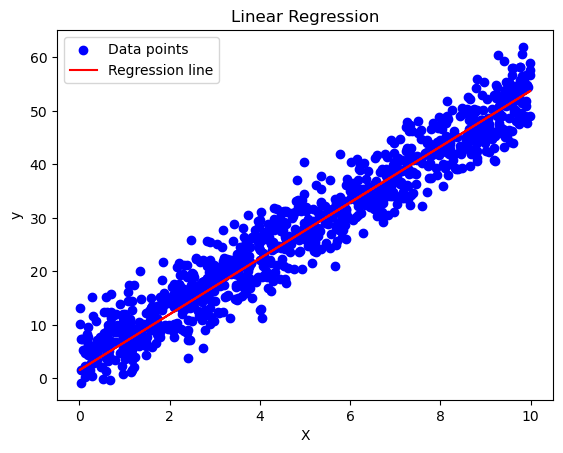

Not converged for learning rate 0.002
[[5.2145906 ]
 [1.63321821]]
Not converged for learning rate 0.003
[[5.20222275]
 [1.71500838]]
Not converged for learning rate 0.004
[[5.19045037]
 [1.79284343]]
Not converged for learning rate 0.005
[[5.17924748]
 [1.86691315]]


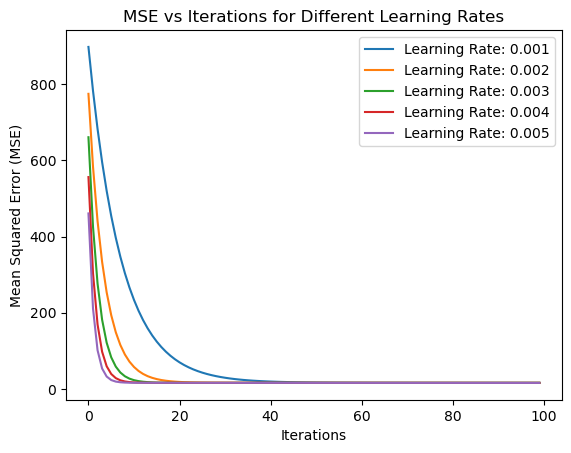

In [12]:
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005] 
num_iterations = 100


for lr in learning_rates:
    weights = generate_weights(X.shape[-1] + 1)

    optimized_weights, mse_history = gradient_descent(X, y, weights, lr, num_iterations)
    
    
    if abs(mse_history[-1] - mse_history[-2]) < 0.001:  
        print(f"Converged for learning rate {lr} and weights {optimized_weights}")
        plot_regression_line(X, y, optimized_weights)
        
        
    else:
        print(f"Not converged for learning rate {lr}")
        print(optimized_weights)

    plt.plot(range(num_iterations), mse_history, label=f'Learning Rate: {lr}')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Iterations for Different Learning Rates')
plt.legend()
plt.show()
